<a href="https://colab.research.google.com/github/julx134/ML-AI-projects/blob/main/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

# Exploratory Data Analysis

In [ ]:
# Global learning variables
alpha = 0.0001
initial_m = -0.5
initial_b = 0
error_plot = []

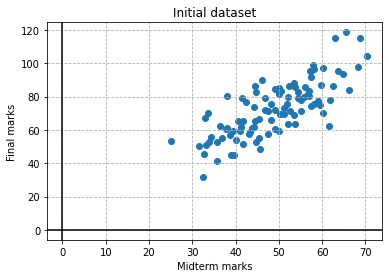

Midterm mean: 48.959
Midterm standard deviation: 9.746494785617061
Finals mean: 72.735
Finals standard deviation: 16.658248631676365


In [ ]:
#import dataset
def eda():
  data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')

  X_raw = data['Midterm mark']
  Y_raw = data['Final mark']
  x_mean = X_raw.mean()
  y_mean = Y_raw.mean()
  x_std = X_raw.std()
  y_std = Y_raw.std()

  plt.scatter(X_raw,Y_raw)
  plt.title('Initial dataset')
  plt.xlabel('Midterm marks')
  plt.ylabel('Final marks')
  plt.grid(linestyle ='--')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.show()
  print(f'Midterm mean: {x_mean}\nMidterm standard deviation: {x_std}\nFinals mean: {y_mean}\nFinals standard deviation: {y_std}')

eda()

In [ ]:
# function to show model on plot
def showModel(b, m, num_iteration, df_data):
  x_raw = df_data['Midterm mark'].values.tolist()
  y_raw = df_data['Final mark'].values.tolist()
  x_plots = []
  y_plots = []
  dataset = df_data.values.tolist()
  
  N = len(dataset)
  for i in range(0, N):
      x = i
      y = m * x + b
      x_plots.append(x)
      y_plots.append(y)
  plt.scatter(x_raw, y_raw)
  plt.plot(x_plots, y_plots, color='red')
  plt.title(f'Model at {num_iteration}th iteration')
  plt.xlabel('Midterm marks')
  plt.ylabel('Final marks')
  plt.grid(linestyle ='--')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.show()


In [ ]:
# error cost function
def error_cost_function(m, b, dataset):
  sum = 0
  N = len(dataset)
  for i in range(0, N):
      x = dataset[i][0]
      y = dataset[i][1]
      sum += np.float128((y - (m * x + b))) * np.float128((y - (m * x + b)))
  return sum / float(N)


In [ ]:
# gradient partial derivatives
def get_new_model(m, b, dataset, alpha):
  gradient_dm = 0
  gradient_db = 0
  N = len(dataset)
  for i in range(0, N):
      x = dataset[i][0]
      y = dataset[i][1]
      
      gradient_dm += -(2/N) * x * (y - ((m * x) + b))
      gradient_db += -(2/N) * (y - ((m * x) + b))
      
  new_m = m - (alpha * gradient_dm)
  new_b = b - (alpha * gradient_db)
  return [new_m, new_b]
  

In [ ]:
# train model function
def trainModel(dataset, learned_vars, alpha, num_iterations):

  model = [learned_vars[0], learned_vars[1]]
  for i in range(num_iterations):
    old_m = model[0]
    old_b = model[1]

    model[0], model[1] = get_new_model(model[0], model[1], dataset, alpha)
    plt.scatter(i, error_cost_function(model[0], model[1], dataset), c='r')

  plt.title("Error Cost Function vs. Iterations")
  plt.ylabel("Error Cost Value")
  plt.xlabel("Num of Iterations")
  plt.show()
  return model[0],model[1]

# Without Standardization

In [ ]:
def run_wo_standardization(i):
  #import data from file
  df_data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
  dataset = df_data.values.tolist()

  #starting [m, b] values
  learned_vars = [initial_m, initial_b]

  print(f'Starting model with m={learned_vars[0]}, b={learned_vars[1]}')

  # train model for ith iterations
  [learned_vars[0], learned_vars[1]]= trainModel(dataset, learned_vars, alpha, i)

  print(f'New model with m={learned_vars[0]}, b={learned_vars[1]}')
  showModel(learned_vars[1], learned_vars[0], i, df_data)
  

Starting model with m=-0.5, b=0


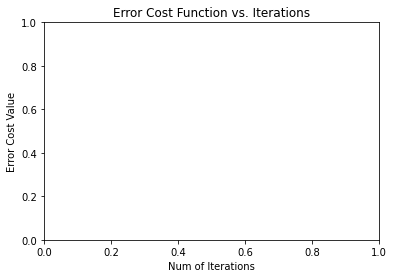

New model with m=-0.5, b=0


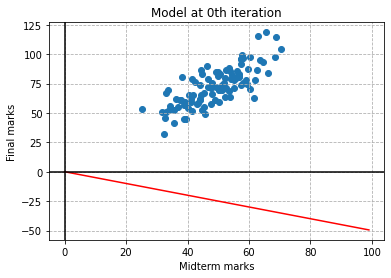

In [ ]:
run_wo_standardization(0)

Starting model with m=-0.5, b=0


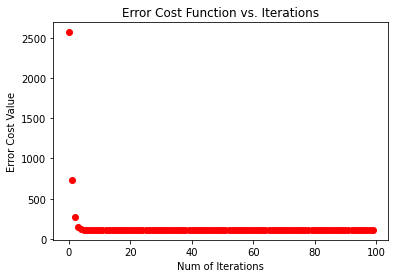

New model with m=1.4785727560143909, b=0.04490536397288714


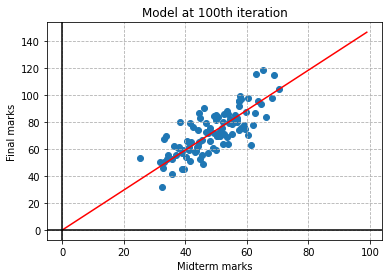

In [ ]:
run_wo_standardization(100)

Starting model with m=-0.5, b=0


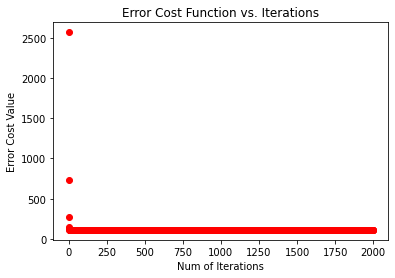

New model with m=1.4763433036607632, b=0.15833790708442708


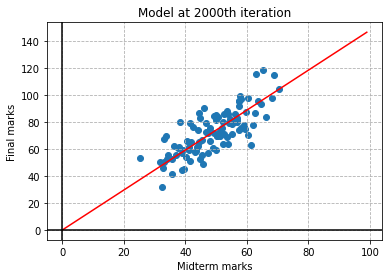

In [ ]:
run_wo_standardization(2000)

# With Standardization

In [ ]:
# Standardize X and Y
def standardize_dataset(dataset, df_data):
  X_raw = df_data['Midterm mark']
  Y_raw = df_data['Final mark']
  x_mean = X_raw.mean()
  y_mean = Y_raw.mean()
  x_std = X_raw.std()
  y_std = Y_raw.std()

  for i in range(len(dataset)):
    dataset[i][0] = (dataset[i][0] - x_mean)/x_std
    dataset[i][1] = (dataset[i][1] - y_mean)/y_std

  return dataset

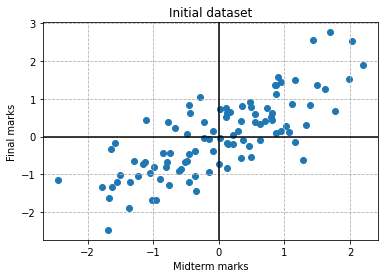

Midterm mean: -2.886579864025407e-16
Midterm standard deviation: 1.0000000000000002
Finals mean: 1.5543122344752193e-17
Finals standard deviation: 1.0


In [ ]:
#import dataset
def eda_stnd():
  df_data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
  dataset = df_data.values.tolist()
  dataset = standardize_dataset(dataset, df_data)
  df_data = pd.DataFrame(dataset, columns =['Midterm mark', 'Final mark'])

  X_raw = df_data['Midterm mark']
  Y_raw = df_data['Final mark']
  x_mean = X_raw.mean()
  y_mean = Y_raw.mean()
  x_std = X_raw.std()
  y_std = Y_raw.std()

  plt.scatter(X_raw,Y_raw)
  plt.title('Initial dataset')
  plt.xlabel('Midterm marks')
  plt.ylabel('Final marks')
  plt.grid(linestyle ='--')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.show()
  print(f'Midterm mean: {x_mean}\nMidterm standard deviation: {x_std}\nFinals mean: {y_mean}\nFinals standard deviation: {y_std}')

eda_stnd()

In [ ]:
# function to show model on plot
def showModel_stnd(b, m, num_iteration, dataset):
  df_data = pd.DataFrame(dataset, columns =['Midterm mark', 'Final mark'])
  x_raw = df_data['Midterm mark']
  y_raw = df_data['Final mark'] 
  x_plots = []
  y_plots = []
  
  
  N = len(dataset)
  x_range = np.linspace(-4, 4, N)
  for i in x_range:
      x = i
      y = m * x + b
      x_plots.append(x)
      y_plots.append(y)
  plt.scatter(x_raw, y_raw)
  plt.plot(x_plots, y_plots, color='red')
  plt.title(f'Model at {num_iteration}th iteration')
  plt.xlabel('Midterm marks')
  plt.ylabel('Final marks')
  plt.grid(linestyle ='--')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.show()

In [ ]:
def run_w_standardization(i):
  #import data from file
  df_data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
  dataset = df_data.values.tolist()
  
  dataset = standardize_dataset(dataset, df_data)

  #starting [m, b] values
  learned_vars = [initial_m, initial_b]

  print(f'Starting model with m={learned_vars[0]}, b={learned_vars[1]}')

  # train model for ith iterations
  [learned_vars[0], learned_vars[1]] = trainModel(dataset, learned_vars, alpha, i)

  print(f'New model with m={learned_vars[0]}, b={learned_vars[1]}')
  showModel_stnd(learned_vars[1], learned_vars[0], i, dataset)

Starting model with m=-0.5, b=0


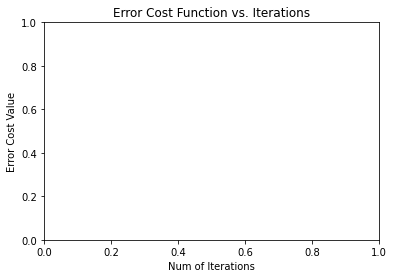

New model with m=-0.5, b=0


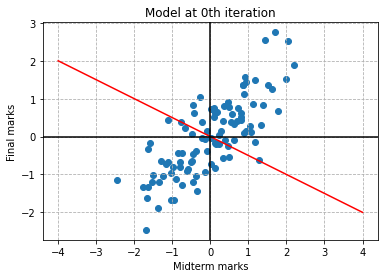

In [ ]:
run_w_standardization(0)

Starting model with m=-0.5, b=0


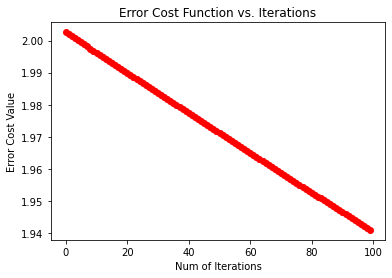

New model with m=-0.475030672874282, b=-2.4674706722294118e-18


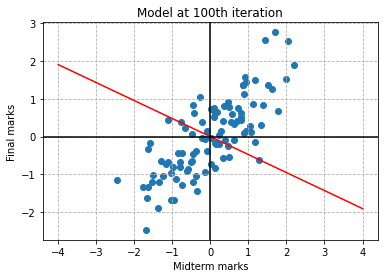

In [ ]:
run_w_standardization(100)

Starting model with m=-0.5, b=0


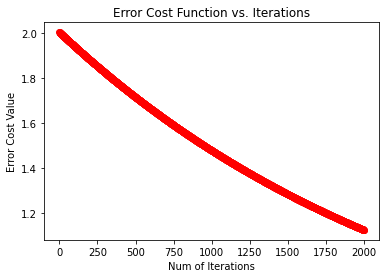

New model with m=-0.08354757025254299, b=-2.193592529842184e-17


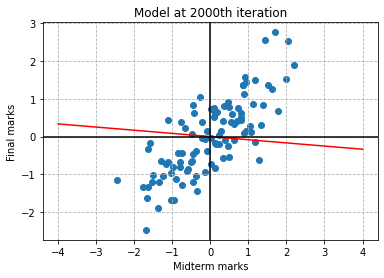

In [ ]:
run_w_standardization(2000)

# Sci-kit Validation


In [ ]:
import matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression


In [ ]:
data_validation = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
data_validation
     

,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2
...,...,...
95,50.0,81.5
96,49.2,72.1
97,50.0,85.2
98,48.1,66.2


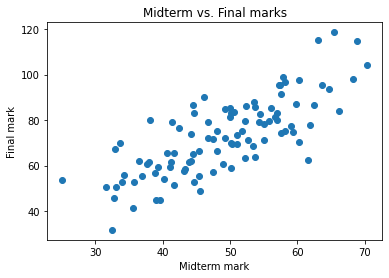

In [ ]:
X_validation = data_validation['Midterm mark'] 
y_validation = data_validation['Final mark']

X_validation = X_validation.values.reshape(-1,1) 
y_validation = y_validation.values.reshape(-1,1)

plt.scatter(X_validation,y_validation)
plt.title('Midterm vs. Final marks')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.show()

The score of the model is: 0.5982684385776686.
The coef of the model is: 1.321992317252377.
The intercept of the model is: 8.01157813964086.


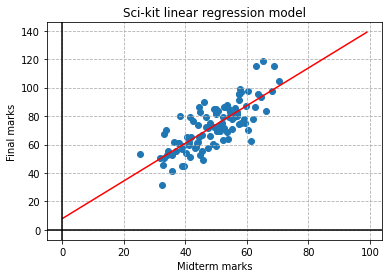

LinearRegression()

In [ ]:
def showValidationModel(m, b, df_data):
  x_raw = df_data['Midterm mark'].values.tolist()
  y_raw = df_data['Final mark'].values.tolist()
  x_plots = []
  y_plots = []
  dataset = df_data.values.tolist()
  
  N = len(dataset)
  for i in range(0, N):
      x = i
      y = m * x + b
      x_plots.append(x)
      y_plots.append(y)
  plt.scatter(x_raw, y_raw)
  plt.plot(x_plots, y_plots, color='red')
  plt.title(f'Sci-kit linear regression model')
  plt.xlabel('Midterm marks')
  plt.ylabel('Final marks')
  plt.grid(linestyle ='--')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')

  

  plt.show()
  return lin_reg_model

lin_reg = LinearRegression()

lin_reg_model = lin_reg.fit(X_validation,y_validation)

model_score = lin_reg_model.score(X_validation, y_validation)


log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {lin_reg_model.coef_[0][0]}.'
print(log_message)

log_message = f'The intercept of the model is: {lin_reg_model.intercept_[0]}.'
print(log_message) 
showValidationModel(lin_reg_model.coef_[0][0], lin_reg_model.intercept_[0], data_validation)

# Observations when alpha = 0.1


The learning rate (alpha) is essentially the step from one model parameters to another. The value of alpha determines how fast and stable the algorithm can find the optimal solution.

A low learning rate, when alpha = 0.0001 results in a slow 'step' between model parameters in order to find the optimal solution

In [ ]:
t1 = time.perf_counter()
alpha = 0.0001
run_w_standardization(2000)
t2 = time.perf_counter()
print(f'Time taken to run: {t2-t1}s')

A fast learning rate such as when alpha = 0.1, results in faster learning time to find the optimal model parameters

In [ ]:
t1 = time.perf_counter()
alpha = 0.1
run_w_standardization(2000)
t2 = time.perf_counter()
print(f'Time taken to run: {t2-t1}s')

As seen in the graphs above, both ran almost in similar time  but we were able to get to the optimal model parameters with a faster learning rate.

Furthermore, the value of the learning rate can also affect the stability of the algorithm as running it on a dataset that is not standardized causes unwanted results such as overshooting or oscillation.

In [ ]:
alpha = 0.1
run_wo_standardization(100)
run_wo_standardization(2000)

# Effects of standardization.



*   Stabilizes the alogorithm to from changes in learning rate

*   Standardization can provide more precise models due to the fact that the dataset is normalized which makes the algorithm less susceptible to outliers

*   It helps with numerical overflow problems since the data is projected to a unit standard of variance, there is less chance of overflow problems such as when multiplying or squaring large numbers especially decimals.




